<a href="https://colab.research.google.com/github/rashifdhafin/PBI-DataScientist-Rakamin-idxpartners/blob/master/ProjectRakamin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

**Load Dataset**

In [ ]:
# Akses ke Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Rakamin/loan_data_2007_2014.csv', index_col=0)

<ipython-input-3-d8fdb6c7a355>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/drive/MyDrive/Rakamin/loan_data_2007_2014.csv', index_col=0)


# **Explore Dataset**

In [ ]:
dataset.shape

(466285, 74)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

Dalam dataset ini, terdapat 466.285 data dengan 74 kolom. Terdapat beberapa kolom yang tidak memiliki nilai. Contoh isi data adalah sebagai berikut:

In [ ]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Langkah selanjutnya, kita cek apakah terdapat data duplikat pada dataset dengan menghitung jumlah id dan member id unik pada dataset

In [ ]:
print("Jumlah id unik dan member id unik")
print("Jumlah id unik: ", dataset.id.nunique())
print("Jumlah member id unik: ", dataset.member_id.nunique())

Jumlah id unik dan member id unik
Jumlah id unik:  466285
Jumlah member id unik:  466285


Jumlah id unik dan member id unik pada dataset yang digunakan memiliki nilai yang sama sehingga dapat disimpulkan tidak ada data duplikat pada dataset.

Selanjutnya, kita hilangkan terlebih dahulu kolom-kolom yang kita tidak perlukan seperti kolom identitas, kolom free text, kolom yang berisi nilai NULL, dan kolom lainnya.

In [ ]:
drop_column = ['id', 'member_id', 'zip_code', 'url', 'desc', 'annual_inc_joint',
               'dti_joint', 'verification_status_joint', 'open_acc_6m',
               'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
               'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
               'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
               'sub_grade']

dataset = dataset.drop(drop_column, axis=1)

Terdapat 23 kolom yang dihapus pada tahap ini. Salah satu kolom yang dihapus adalah kolom `sub_grade`. Kolom `sub_grade` dihapus karena grade pinjaman sudah diwakili oleh kolom grade. Kolom sisanya dihapus karena kolom-kolom tersebut merupakan kolom identitas, kolom free text dan kolom yang berisi nilai NULL. Jumlah kolom yang tersisa saat ini adalah 51 kolom.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   emp_title                    438697 non-null  object 
 8   emp_length                   445277 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466281 non-null  float64
 11  verification_status          466285 non-null  object 
 12  issue_d                      466285 non-null  object 
 13 

In [ ]:
dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,NaN,10+ years,RENT,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,RENT,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,NaN,10+ years,RENT,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,...,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,University Medical Group,1 year,RENT,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


# **Define Label**

Tujuan dari proyek ini adalah untuk memprediksi credit risk dengan data yang terdiri dari data pinjaman yang diterima dan data pinjaman yang ditolak. Untuk mengetahui apakah seseorang merupakan peminjam yang baik atau buruk, maka kita perlu mengetahui status pinjaman terkini yang ada di dataset ini. Kolom yang berisi status pinjaman pada dataset ini adalah kolom `loan_status`.

In [ ]:
dataset.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Untuk mengetahui apakah seseorang merupakan peminjam yang baik atau buruk berdasarkan status pinjaman saat ini, maka kita perlu mendefinisikan apa itu pinjaman yang baik dan pinjaman yang buruk terlebih dahulu. Pinjaman yang baik tentunya pinjaman yang pembayarannya lancar, sudah lunas, sedang dalam tempo dan pembayarannya tidak terlambat. Sedangkan pinjaman yang buruk merupakan pinjaman yang pembayarannya macet dan terlambat. Pada dataset yang digunakan terdapat dua status pinjaman yang pembayarannya terlambat dengan durasi keterlambatan yang berbeda. Pada proyek ini, kita asumsikan sebuah pinjaman dianggap buruk jika pembayaran pinjaman terlambat lebih dari 30 hari.


Berdasarkan definisi yang sudah kita tentukan, maka pinjaman dengan status `Current`, `Fully Paid`, `In Grace Period`, `Does not meet the credit policy. Status:Fully Paid`, dan `Late (16-30 days)` sebagai pinjaman yang baik dan status pinjaman sisanya dimasukkan ke dalam pinjaman yang buruk.

In [ ]:
good_loan_status = ['Current',
                    'Fully Paid',
                    'In Grace Period',
                    'Does not meet the credit policy. Status:Fully Paid',
                    'Late (16-30 days)']

# Buat kolom 'loan_label' sebagai label pinjaman
dataset['loan_label'] = np.where(dataset['loan_status'].isin(good_loan_status), 'good loan', 'bad loan')

In [ ]:
dataset.loan_label.value_counts()

good loan    415317
bad loan      50968
Name: loan_label, dtype: int64

Berdasarkan hasil pelabelan pinjaman, terdapat 415.317 data pinjaman baik dan 50.968 data pinjaman buruk.

Karena pinjaman sudah dilabeli, maka kolom `loan_status` sudah tidak digunakan lagi sehingga kolom tersebut dapat dibuang.

In [ ]:
dataset.drop('loan_status', axis=1, inplace=True)

# **Feature Engineering**

In [ ]:
dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_label
0,5000,5000,4975.0,36 months,10.65,162.87,B,NaN,10+ years,RENT,...,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,good loan
1,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,RENT,...,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,bad loan
2,2400,2400,2400.0,36 months,15.96,84.33,C,NaN,10+ years,RENT,...,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,good loan
3,10000,10000,10000.0,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,...,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,good loan
4,3000,3000,3000.0,60 months,12.69,67.79,B,University Medical Group,1 year,RENT,...,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,good loan


Dari sampel dataset di atas, terdapat beberapa kolom penting yang harus diubah agar dapat digunakan pada proses Machine Learning. Kolom-kolom tersebut memuat data integer tetapi berformat string serta kolom dengan format date sehingga kolom tersebut perlu diubah.

**term**

Menghilangkan string yang tidak diperlukan dan konversi data ke integer. Contoh: ' 36 months' -> 36

In [ ]:
dataset['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
dataset['term'] = dataset['term'].str.extract('\s*(\d+)').astype(int)

In [ ]:
dataset['term'].unique()

array([36, 60])

**emp_length**

Menghilangkan string yang tidak diperlukan dan konversi data ke integer. Untuk data dengan nilai '10+ years' diubah menjadi 10 sedangkan data dengan nilai '< 1 year' diubah menjadi 0. Sisa data lain hanya menghilangkan string ' years' saja.

In [ ]:
dataset['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [ ]:
def convert_employment_length(value):
    if pd.isna(value):
        return None
    elif '10+' in value:
        return 10
    elif '< 1' in value:
        return 0
    else:
        return int(value.split()[0])

dataset['emp_length'] = dataset['emp_length'].apply(convert_employment_length)

In [ ]:
dataset['emp_length'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

**issue_d**

Mengubah kolom `issue_d` dari format bulan-tahun menjadi berapa lama waktu berlalu sejak bulan dan tahun tersebut. Dataset yang digunakan adalah data pinjaman dari tahun 2007 sampai 2014. Sehingga kita perlu mengasumsikan tanggal yang relevan dengan dataset yang digunakan. Karena format tanggal yang digunakan adalah bulan-tahun, maka kita asumsikan pengolahan data dilakukan pada Desember 2017.

In [ ]:
dataset['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

Buat fungsi convert_to_timedelta untuk konversi data ke format bulan-tahun kemudian hitung selisih waktu dalam bulan

In [ ]:
# Asumsikan tanggal pengolahan sekarang Desember 2017
now_date = pd.to_datetime("2017-12")

# Fungsi untuk mengubah format bulan-tahun menjadi selisih waktu dalam bulan
def convert_to_timedelta(date_str):
    if pd.notna(date_str):
        date_object = pd.to_datetime(date_str, format="%b-%y")

        # Menghitung selisih waktu dari tanggal sekarang dalam bulan
        months_difference = (now_date.year - date_object.year) * 12 + now_date.month - date_object.month
        return months_difference
    else:
        return None

In [ ]:
dataset['months_since_issue_d'] = dataset['issue_d'].apply(convert_to_timedelta)

In [ ]:
dataset['months_since_issue_d'].unique()

array([ 72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47])

In [ ]:
dataset.drop('issue_d', axis=1, inplace=True)

**`erliest_cr_line`**

Melakukan preprocessing seperti pada kolom `issue_d`.

In [ ]:
dataset['earliest_cr_line'].unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96', 'Nov-04',
       'Jul-05', 'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89',
       'Jul-03', 'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03',
       'Jan-01', 'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01',
       'Feb-02', 'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Feb-97',
       'Apr-05', 'Oct-07', 'Dec-00', 'Apr-07', 'Dec-01', 'Jan-03',
       'Mar-94', 'Sep-98', 'Jun-04', 'Nov-95', 'Jul-99', 'Jun-95',
       'Sep-92', 'Jan-02', 'Apr-92', 'Oct-06', 'May-00', 'Dec-98',
       'Dec-04', 'Oct-00', 'May-02', 'May-06', 'Jul-02', 'Jul-06',
       'May-97', 'Oct-05', 'Apr-95', 'Oct-02', 'Jan-00', 'Apr-00',
       'Dec-94', 'Sep-05', 'Dec-84', 'Dec-99', 'Nov-03', 'Jun-89',
       'Jun-03', 'Oct-96', 'May-03', 'Jun-02', 'Jun-07', 'Dec-96',
       'Feb-84', 'Sep-02', 'Jan-86', 'May-98', 'Jan-97', 'Jun-05',
       'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94', 'Jun-92', 'Mar-97',
       'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00', 'Feb-01', 'Dec-

In [ ]:
dataset['months_since_earliest_cr_line'] = dataset['earliest_cr_line'].apply(convert_to_timedelta)

In [ ]:
dataset['months_since_earliest_cr_line'].unique()

array([ 395.,  224.,  193.,  262.,  263.,  157.,  149.,  131.,  164.,
        159.,  239.,  338.,  173.,  319.,  123.,  230.,  292.,  170.,
        203.,  241.,  418.,  389.,  176.,  198.,  190.,  400.,  133.,
        360.,  433.,  250.,  152.,  122.,  204.,  128.,  192.,  179.,
        285.,  231.,  162.,  265.,  221.,  270.,  303.,  191.,  308.,
        134.,  211.,  228.,  156.,  206.,  187.,  139.,  185.,  137.,
        247.,  146.,  272.,  182.,  215.,  212.,  276.,  147.,  396.,
        216.,  169.,  342.,  174.,  254.,  175.,  186.,  126.,  252.,
        406.,  183.,  383.,  235.,  251.,  150.,  334.,  165.,  269.,
        280.,  306.,  249.,  140.,  332.,  220.,  207.,  202.,  348.,
        226.,  312.,  208.,  158.,  160.,  154.,  145.,  205.,  127.,
        323.,  210.,  136.,  180.,  294.,  138.,  166.,  324.,  213.,
        274.,  197.,  188.,  135.,  223.,  232.,  144.,  163.,  194.,
        414.,  381.,  452.,  161.,  113.,  259.,  167.,  181.,  184.,
        196.,  321.,

Hasil selisih bulan yang didapat pada kolom `months_since_earliest_cr_line` terdapat nilai negatif. Hal ini dikarenakan format tanggal yang digunakan pada fungsi to_datetime() pada library Pandas memakai format UNIX. Format UNIX merupakan format penghitungan waktu dimulai dari tanggal 1 Januari 1970 00.00 sehingga tahun dibawah 1970 akan dikonversi menjadi 20XX alih-alih 19XX. Akibatnya, selisih waktu yang didapat bernilai negatif.

Untuk mengatasi hal tersebut, kita asumsikan bahwa data yang memiliki nilai negatif merupakan peminjam lama. Sehingga seharusnya selisih waktu yang didapat pasti bernilai besar. Maka kita konversi data dengan nilai negatif menjadi nilai maksimum pada kolom `months_since_earliest_cr_line`

In [ ]:
max_value = dataset['months_since_earliest_cr_line'].max()
dataset['months_since_earliest_cr_line'] = np.where(dataset['months_since_earliest_cr_line'] < 0, max_value, dataset['months_since_earliest_cr_line'])

In [ ]:
dataset['months_since_earliest_cr_line'].unique()

array([395., 224., 193., 262., 263., 157., 149., 131., 164., 159., 239.,
       338., 173., 319., 123., 230., 292., 170., 203., 241., 418., 389.,
       176., 198., 190., 400., 133., 360., 433., 250., 152., 122., 204.,
       128., 192., 179., 285., 231., 162., 265., 221., 270., 303., 191.,
       308., 134., 211., 228., 156., 206., 187., 139., 185., 137., 247.,
       146., 272., 182., 215., 212., 276., 147., 396., 216., 169., 342.,
       174., 254., 175., 186., 126., 252., 406., 183., 383., 235., 251.,
       150., 334., 165., 269., 280., 306., 249., 140., 332., 220., 207.,
       202., 348., 226., 312., 208., 158., 160., 154., 145., 205., 127.,
       323., 210., 136., 180., 294., 138., 166., 324., 213., 274., 197.,
       188., 135., 223., 232., 144., 163., 194., 414., 381., 452., 161.,
       113., 259., 167., 181., 184., 196., 321., 339., 279., 171., 219.,
       148., 372., 229., 142., 283., 121., 298., 313., 151., 528., 199.,
       333., 261., 458., 438., 201., 200., 222., 28

In [ ]:
dataset.drop('earliest_cr_line', axis=1, inplace=True)

**`last_pymnt_d`**

Melakukan preprocessing seperti pada kolom `issue_d`.

In [ ]:
dataset['last_pymnt_d'].unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'Jan-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Apr-15', 'Feb-14', 'Sep-14', 'Jun-12',
       'Feb-13', 'Mar-13', 'May-14', 'Mar-15', 'Jan-13', 'Dec-13',
       'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15', 'Dec-15', 'Jan-12',
       'Oct-15', 'Nov-14', 'Mar-12', 'May-12', 'Jun-15', 'May-15',
       'Jul-15', 'Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10',
       'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09',
       'Jul-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09',
       'Jan-09', 'Dec-08', 'Oct-08', 'Aug-08', 'Jul-08', 

In [ ]:
dataset['months_since_last_pymnt_d'] = dataset['last_pymnt_d'].apply(convert_to_timedelta)

In [ ]:
dataset['months_since_last_pymnt_d'].unique()

array([ 35.,  56.,  42.,  23.,  68.,  61.,  54.,  51.,  65.,  50.,  55.,
        34.,  28.,  62.,  63.,  nan,  60.,  36.,  52.,  49.,  47.,  44.,
        40.,  38.,  64.,  41.,  53.,  32.,  46.,  39.,  66.,  58.,  57.,
        43.,  33.,  59.,  48.,  70.,  45.,  27.,  25.,  24.,  71.,  26.,
        37.,  69.,  67.,  30.,  31.,  29.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 110.,
       112., 113., 111., 114., 115., 109., 116., 117., 118., 119., 120.])

In [ ]:
dataset.drop('last_pymnt_d', axis=1, inplace=True)

**`next_pymnt_d`**

Melakukan preprocessing seperti pada kolom `issue_d`.

In [ ]:
dataset['next_pymnt_d'].unique()

array([nan, 'Feb-16', 'Jan-16', 'Sep-13', 'Feb-14', 'May-14', 'Jun-13',
       'Mar-12', 'Apr-12', 'May-13', 'Aug-12', 'Aug-13', 'Jun-12',
       'Nov-13', 'Feb-12', 'Oct-11', 'Jan-13', 'Jan-14', 'Jul-13',
       'Jul-15', 'Jan-12', 'Dec-12', 'Jun-11', 'Feb-13', 'Nov-11',
       'Nov-12', 'Dec-11', 'Aug-11', 'Sep-11', 'Apr-11', 'Mar-14',
       'Apr-13', 'Mar-11', 'Jul-12', 'Aug-14', 'Oct-13', 'Sep-12',
       'May-12', 'Apr-15', 'Jul-11', 'Dec-15', 'Dec-13', 'Jan-11',
       'Oct-12', 'Nov-14', 'Mar-13', 'Aug-15', 'Feb-15', 'May-15',
       'Jul-14', 'Nov-15', 'Sep-14', 'Oct-15', 'May-11', 'Feb-11',
       'Dec-14', 'Jun-15', 'Apr-14', 'Jan-15', 'Sep-15', 'Jun-14',
       'Nov-10', 'Oct-10', 'Dec-10', 'Mar-15', 'Oct-14', 'Jul-10',
       'Sep-10', 'May-10', 'Aug-10', 'Mar-10', 'Jun-10', 'Apr-10',
       'Feb-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Jan-10', 'Sep-09',
       'Jun-09', 'Aug-09', 'Jul-09', 'May-09', 'Apr-09', 'Jan-09',
       'Oct-08', 'Feb-09', 'Nov-08', 'Sep-08', 'Mar-09', 

In [ ]:
dataset['months_since_next_pymnt_d'] = dataset['next_pymnt_d'].apply(convert_to_timedelta)

In [ ]:
dataset['months_since_next_pymnt_d'].unique()

array([ nan,  22.,  23.,  51.,  46.,  43.,  54.,  69.,  68.,  55.,  64.,
        52.,  66.,  49.,  70.,  74.,  59.,  47.,  53.,  29.,  71.,  60.,
        78.,  58.,  73.,  61.,  72.,  76.,  75.,  80.,  45.,  56.,  81.,
        65.,  40.,  50.,  63.,  67.,  32.,  77.,  24.,  48.,  83.,  62.,
        37.,  57.,  28.,  34.,  31.,  41.,  25.,  39.,  26.,  79.,  82.,
        36.,  30.,  44.,  35.,  27.,  42.,  85.,  86.,  84.,  33.,  38.,
        89.,  87.,  91.,  88.,  93.,  90.,  92.,  94.,  96.,  97.,  98.,
        95.,  99., 102., 100., 101., 103., 104., 107., 110., 106., 109.,
       111., 105., 108., 112., 114., 113., 116., 115., 118., 119., 117.,
       120.,  21.])

In [ ]:
dataset.drop('next_pymnt_d', axis=1, inplace=True)

**`last_credit_pull_d`**

Melakukan preprocessing seperti pada kolom `issue_d`.

In [ ]:
dataset['last_credit_pull_d'].unique()

array(['Jan-16', 'Sep-13', 'Jan-15', 'Sep-15', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Jul-12', 'Sep-12', 'May-13', 'Oct-15',
       'Jun-12', 'Mar-15', 'Dec-12', 'Jul-14', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12', 'Apr-12', 'Aug-15',
       'Jun-14', 'Jan-12', 'Aug-14', 'Jun-13', 'Dec-13', 'May-12',
       'Jan-14', 'Jul-13', 'Apr-13', 'May-15', 'Feb-15', 'Mar-12',
       'Nov-11', 'Dec-11', 'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Feb-10', 'Mar-10',
       'Aug-07', 'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09',
       'Jul-09', 'Aug-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09',
       'Feb-09', 'Jan-09', 'Dec-08', 'Jun-08', 'Sep-08', 

In [ ]:
dataset['months_since_last_credit_pull_d'] = dataset['last_credit_pull_d'].apply(convert_to_timedelta)

In [ ]:
dataset.drop('last_credit_pull_d', axis=1, inplace=True)

# **Feature Selection**

Sejauh ini, kita sudah membuang beberapa kolom seperti kolom identitas, kolom free text, kolom dengan nilai Null, dan kolom `sub_grade`. Namun, untuk meningkatkan nilai akurasi yang didapat, kita masih harus membuang beberapa kolom dengan high cardinality, kolom dengan kategori tertentu yang sangat dominan, dan kolom dengan korelasi tertinggi dengan kolom yang bukan target class.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 51 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   loan_amnt                        466285 non-null  int64  
 1   funded_amnt                      466285 non-null  int64  
 2   funded_amnt_inv                  466285 non-null  float64
 3   term                             466285 non-null  int64  
 4   int_rate                         466285 non-null  float64
 5   installment                      466285 non-null  float64
 6   grade                            466285 non-null  object 
 7   emp_title                        438697 non-null  object 
 8   emp_length                       445277 non-null  float64
 9   home_ownership                   466285 non-null  object 
 10  annual_inc                       466281 non-null  float64
 11  verification_status              466285 non-null  object 
 12  py

Tiap kolom pada dataset memiliki tipe data yang berbeda. Untuk mempermudah pengecekan, kita periksa data berdasarkan tipe data kategorikal dan numerik.

## **Kolom dengan High Cardinality dan data kategori tertentu yang sangat dominan**

**Kolom dengan tipe data kategorikal**

In [ ]:
dataset.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
loan_label                  2
dtype: int64

Kolom `emp_title` dan kolom `title` merupakan kolom dengan high cardinality karena memiliki nilai unik yang banyak sehingga harus dihapus. Selain itu terdapat satu kolom yang hanya memiliki satu nilai unik yaitu `application_type` sehingga kolom tersebut perlu dihapus.

In [ ]:
dataset.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [ ]:
dataset.select_dtypes(include='object').nunique()

grade                   7
home_ownership          6
verification_status     3
pymnt_plan              2
purpose                14
addr_state             50
initial_list_status     2
loan_label              2
dtype: int64

Kemudian dapat kita lihat, ada dua kolom selain `loan_label` yang memiliki 2 nilai unik yaitu kolom `pymnt_plan` dan `initial_list_status`.

In [ ]:
dataset['pymnt_plan'].value_counts()

n    466276
y         9
Name: pymnt_plan, dtype: int64

In [ ]:
dataset['initial_list_status'].value_counts()

f    303005
w    163280
Name: initial_list_status, dtype: int64

Dapat dilihat bahwa pada kolom `pymnt_plan` terdapat kategori 'n' yang mendominasi dengan jumlah 466.276 data sedangkan kategori 'y' hanya 9 data sehingga kolom `pymnt_plan` harus dihapus. Untuk kolom `initial_list_status` tidak perlu dihapus karena tidak ada kategori yang terlalu dominan.

In [ ]:
dataset.drop('pymnt_plan', axis=1, inplace=True)

In [ ]:
dataset.select_dtypes(include='object').nunique()

grade                   7
home_ownership          6
verification_status     3
purpose                14
addr_state             50
initial_list_status     2
loan_label              2
dtype: int64

**Kolom dengan tipe data numerikal**

In [ ]:
dataset.select_dtypes(exclude='object').nunique()

loan_amnt                            1352
funded_amnt                          1354
funded_amnt_inv                      9854
term                                    2
int_rate                              506
installment                         55622
emp_length                             11
annual_inc                          31901
dti                                  3997
delinq_2yrs                            24
inq_last_6mths                         28
mths_since_last_delinq                145
mths_since_last_record                123
open_acc                               62
pub_rec                                26
revol_bal                           58142
revol_util                           1269
total_acc                             112
out_prncp                          135665
out_prncp_inv                      141189
total_pymnt                        351609
total_pymnt_inv                    347659
total_rec_prncp                    172713
total_rec_int                     

Pada data dengan tipe data `non-object`, kolom `policy_code` hanya memiliki satu nilai unik saja sehingga harus dihapus

In [ ]:
dataset.drop('policy_code', axis=1, inplace=True)

In [ ]:
dataset.select_dtypes(exclude='object').nunique()

loan_amnt                            1352
funded_amnt                          1354
funded_amnt_inv                      9854
term                                    2
int_rate                              506
installment                         55622
emp_length                             11
annual_inc                          31901
dti                                  3997
delinq_2yrs                            24
inq_last_6mths                         28
mths_since_last_delinq                145
mths_since_last_record                123
open_acc                               62
pub_rec                                26
revol_bal                           58142
revol_util                           1269
total_acc                             112
out_prncp                          135665
out_prncp_inv                      141189
total_pymnt                        351609
total_pymnt_inv                    347659
total_rec_prncp                    172713
total_rec_int                     

## **Kolom dengan korelasi tinggi dengan kolom selain label**

<ipython-input-55-946e2f32a753>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


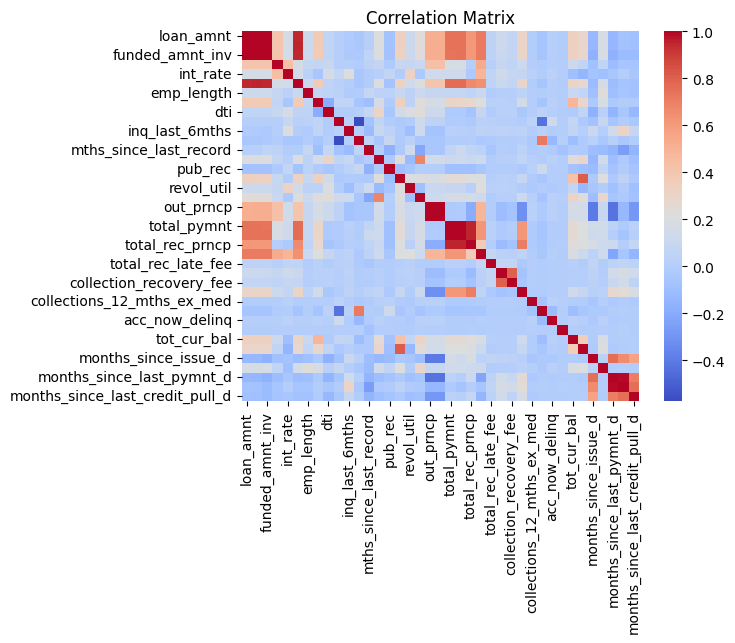

In [ ]:
correlation_matrix = dataset.corr()

# Visualisasi matriks korelasi dengan heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Pasangan kolom-kolom yang memiliki nilai korelasi tinggi akan kita hapus. Umumnya nilai ambang korelasi yang digunakan adalah 0.7

In [ ]:
# Menentukan nilai ambang korelasi
threshold = 0.7

# Mencari kolom yang berkorelasi tinggi
high_correlation_cols = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_correlation_cols.append(colname)

In [ ]:
high_correlation_cols

['funded_amnt',
 'funded_amnt_inv',
 'funded_amnt_inv',
 'installment',
 'installment',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt',
 'total_pymnt',
 'total_pymnt',
 'total_pymnt_inv',
 'total_pymnt_inv',
 'total_pymnt_inv',
 'total_pymnt_inv',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_int',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'months_since_last_pymnt_d',
 'months_since_next_pymnt_d',
 'months_since_last_credit_pull_d',
 'months_since_last_credit_pull_d']

In [ ]:
dataset.drop(high_correlation_cols, axis=1, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   loan_amnt                      466285 non-null  int64  
 1   term                           466285 non-null  int64  
 2   int_rate                       466285 non-null  float64
 3   grade                          466285 non-null  object 
 4   emp_length                     445277 non-null  float64
 5   home_ownership                 466285 non-null  object 
 6   annual_inc                     466281 non-null  float64
 7   verification_status            466285 non-null  object 
 8   purpose                        466285 non-null  object 
 9   addr_state                     466285 non-null  object 
 10  dti                            466285 non-null  float64
 11  delinq_2yrs                    466256 non-null  float64
 12  inq_last_6mths                

Jumlah kolom yang tersisa saat ini adalah 31 kolom

# **Missing Values**

In [ ]:
dataset.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,...,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,loan_label,months_since_issue_d,months_since_earliest_cr_line
0,5000,36,10.65,B,10.0,RENT,24000.0,Verified,credit_card,AZ,...,0.0,0.00,0.00,0.0,0.0,NaN,NaN,good loan,72,395.0
1,2500,60,15.27,C,0.0,RENT,30000.0,Source Verified,car,GA,...,0.0,0.00,117.08,0.0,0.0,NaN,NaN,bad loan,72,224.0
2,2400,36,15.96,C,10.0,RENT,12252.0,Not Verified,small_business,IL,...,0.0,0.00,0.00,0.0,0.0,NaN,NaN,good loan,72,193.0
3,10000,36,13.49,C,10.0,RENT,49200.0,Source Verified,other,CA,...,0.0,16.97,0.00,0.0,0.0,NaN,NaN,good loan,72,262.0
4,3000,60,12.69,B,1.0,RENT,80000.0,Source Verified,other,OR,...,766.9,0.00,0.00,0.0,0.0,NaN,NaN,good loan,72,263.0


Berdasarkan sampel dataset yang kita punya saat ini, terdapat beberapa kolom yang memiliki missing value. Oleh karena itu, kita akan membuang kolom dengan persentase missing value yang tinggi.

In [ ]:
check_missing_value = dataset.isnull().mean() * 100
check_missing_value.sort_values(ascending=False)

mths_since_last_record           86.566585
mths_since_last_delinq           53.690554
tot_cur_bal                      15.071469
tot_coll_amt                     15.071469
emp_length                        4.505399
revol_util                        0.072917
collections_12_mths_ex_med        0.031097
open_acc                          0.006219
inq_last_6mths                    0.006219
acc_now_delinq                    0.006219
total_acc                         0.006219
pub_rec                           0.006219
months_since_earliest_cr_line     0.006219
delinq_2yrs                       0.006219
annual_inc                        0.000858
dti                               0.000000
months_since_issue_d              0.000000
loan_label                        0.000000
int_rate                          0.000000
grade                             0.000000
home_ownership                    0.000000
recoveries                        0.000000
total_rec_late_fee                0.000000
out_prncp  

Pada proyek ini, kolom dengan persentase missing value diatas 80% akan dihapus. Kolom dengan persentase missing value diatas 80% adalah kolom `mths_since_last_record`

In [ ]:
dataset.drop('mths_since_last_record', axis=1, inplace=True)

Terdapat beberapa kolom lain yang memiliki missing value antara lain `mths_since_last_delinq`, `tot_cur_bal`, `tot_coll_amt`, `emp_length`, `revol_util`, `collections_12_mths_ex_med`, `open_acc`, `inq_last_6mths`, `acc_now_delinq`, `total_acc`, `pub_rec`, `months_since_earliest_cr_line`, `delinq_2yrs`, dan `annual_inc`. Tiap nilai missing value akan diisi dengan nilai yang sesuai penjelasan dari kolom tersebut.

**`mths_since_last_delinq`**

In [ ]:
dataset['mths_since_last_delinq'].unique()

array([ nan,  35.,  38.,  61.,   8.,  20.,  18.,  68.,  45.,  48.,  41.,
        40.,  74.,  25.,  53.,  39.,  10.,  26.,  56.,  77.,  28.,  52.,
        24.,  16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  80.,
        22.,  59.,  79.,  44.,  64.,  57.,  14.,  63.,  49.,  15.,  73.,
        70.,  29.,  51.,   5.,  75.,  55.,   2.,  30.,  47.,  33.,  69.,
         4.,  43.,  21.,  27.,  46.,  81.,  78.,  82.,  31.,  76.,  62.,
        72.,  42.,  50.,   3.,  12.,  67.,  36.,  34.,  58.,  17.,  71.,
        66.,  32.,   6.,  37.,   7.,   1.,  83.,  86., 115.,  96., 103.,
       120., 106.,  89., 107.,  85.,  97.,  95.,   0., 110.,  84., 135.,
        88.,  87., 122.,  91., 146., 134., 114.,  99.,  93., 127., 101.,
        94., 102., 129., 113., 139., 131., 156., 143., 109., 119., 149.,
       118., 130., 148., 126.,  90., 141., 116., 100., 152.,  98.,  92.,
       108., 133., 104., 111., 105., 170., 124., 136., 180., 188., 140.,
       151., 159., 121.])

`mths_since_last_delinq` merupakan kolom yang berisi nilai jumlah bulan sejak kenakalan terkahir peminjam. Terdapat dua nilai kosong pada kolom ini yaitu nilai '0' dan 'NaN'. Karena kolom ini merupakan jumlah bulan sejak kenakalan terakhir peminjam, maka kita asumsikan bahwa data dengan nilai 'NaN' memiliki arti tidak ada kenakalan yang terjadi sehingga kita isi dengan nilai '0'.

In [ ]:
dataset['mths_since_last_delinq'].fillna(0, inplace=True)

**`tot_cur_bal`**

In [ ]:
dataset['tot_cur_bal'].unique()

array([    nan, 114834.,  14123., ..., 294998., 591610.,  57477.])

`tot_cur_bal` merupakan kolom yang berisi nilai jumlah saldo saat ini dari semua akun. Hanya ada satu nilai kosong pada kolom ini yaitu nilai 'NaN'. Kita asumsikan bahwa data dengan nilai 'NaN' merupakan jumlah saldo saat ini dengan nilai '0'

In [ ]:
dataset['tot_cur_bal'].fillna(0, inplace=True)

**`tot_coll_amt`**

In [ ]:
dataset['tot_coll_amt'].unique()

array([   nan,     0., 15386., ..., 16125.,  9778.,  6532.])

`tot_coll_amt` merupakan kolom yang berisi jumlah penagihan yang terutang. Terdapat dua nilai kosong pada kolom ini yaitu nilai '0' dan 'NaN'. Kita asumsikan data dengan nilai 'NaN' menyatakan tidak ada jumlah penagihan yang terutang sehingga dapat kita ganti dengan nilai '0'.

In [ ]:
dataset['tot_coll_amt'].fillna(0, inplace=True)

**`emp_length`**

In [ ]:
dataset['emp_length'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

Kolom `emp_length` merupakan kolom yang berisi waktu masa kerja dalam tahun. Pada pengolahan sebelumnya, kita mengasumsikan nilai '< 1 year' dengan nilai 0 karena belum ada 1 tahun bekerja. Sedangkan ada nilai kosong lain yaitu 'NaN'. Kita asumsikan data dengan nilai 'NaN' menyatakan seseorang belum pernah bekerja di bawah 1 tahun sehingga dapat kita ganti dengan nilai 0.

In [ ]:
dataset['emp_length'].fillna(0, inplace=True)

**`revol_util`**

In [ ]:
dataset['revol_util'].unique()

array([ 83.7,   9.4,  98.5, ..., 111.3, 113. , 141.8])

Kolom `revol_util` merupakan kolom tingkat pemanfaatan jalur bergulir, atau jumlah kredit yang digunakan peminjam relatif terhadap seluruh kredit bergulir yang tersedia. Kita ganti nilai 'NaN' dengan 0.

In [ ]:
dataset['revol_util'].fillna(0, inplace=True)

**`collections_12_mths_ex_med`**

In [ ]:
dataset['collections_12_mths_ex_med'].unique()

array([ 0., nan,  1.,  2.,  4.,  3.,  6., 16., 20.,  5.])

Kolom `collections_12_mths_ex_med` merupakan jumlah penagihan dalam 12 bulan tidak termasuk penagihan medis. Kita asumsikan nilai 'NaN' menyatakan tidak ada penagihan yang terjadi sehingga kita ganti dengan nilai 0.

In [ ]:
dataset['collections_12_mths_ex_med'].fillna(0, inplace=True)

**`open_acc`**

In [ ]:
dataset['open_acc'].unique()

array([ 3.,  2., 10., 15.,  9.,  7.,  4., 11., 14., 12., 20.,  8.,  6.,
       17.,  5., 13., 16., 30., 21., 18., 19., 27., 23., 34., 25., 22.,
       24., 26., 32., 28., 29., 33., 31., 39., 35., 36., 38., 44., 41.,
       42.,  1., 46., 37., 47., nan, 40., 45., 49., 53., 51., 43.,  0.,
       62., 48., 50., 52., 54., 76., 58., 55., 84., 75., 61.])

Kolom `open_acc` merupakan jumlah jalur kredit yang dibuka pada file kredit peminjam. Terdapat dua nilai kosong yaitu '0' dan 'NaN'. Data dengan nilai 'NaN' kita asumsikan tidak ada jalur kredit yang dibuka sehingga dapat diganti dengan nilai 0.

In [ ]:
dataset['open_acc'].fillna(0, inplace=True)

**`inq_last_6mths`**

In [ ]:
dataset['inq_last_6mths'].unique()

array([ 1.,  5.,  2.,  0.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12.,
       15., 14., 33., 17., 32., 24., 13., 18., 16., 31., 28., 25., 27.,
       20., 19., nan])

Kolom `inq_last_6mths` merupakan jumlah pengambilan data peminjam dalam 6 bulan terakhir diluar kendaraan dan hipotek. Data bernilai 'NaN' dapat kita asumsikan tidak ada pengambilan data peminjam dalam 6 bulan terakhir sehingga dapat kita ganti dengan nilai 0.

In [ ]:
dataset['inq_last_6mths'].fillna(0, inplace=True)

**`acc_now_delinq`**

In [ ]:
dataset['acc_now_delinq'].unique()

array([ 0.,  1., nan,  2.,  3.,  5.,  4.])

Kolom `acc_now_delinq` merupakan jumlah akun peminjam sekarang yang nakal. Data dengan nilai 'NaN' dapat kita asumsikan tidak ada jumlah akun yang terindikasi nakal sehingga dapat diganti dengan nilai 0.

In [ ]:
dataset['acc_now_delinq'].fillna(0, inplace=True)

**`total_acc`**

In [ ]:
dataset['total_acc'].unique()

array([  9.,   4.,  10.,  37.,  38.,  12.,  11.,  13.,   3.,  23.,  34.,
        29.,  28.,  42.,  14.,  22.,  21.,  17.,   7.,  31.,  44.,  26.,
        16.,   6.,  18.,  27.,  24.,  25.,  40.,  35.,   8.,  20.,  15.,
        19.,  36.,  51.,  32.,  30.,  33.,  46.,   5.,  61.,  56.,  50.,
        41.,  39.,  79.,  62.,  43.,  47.,  53.,  45.,  60.,  55.,  52.,
        58.,  54.,  57.,  49.,  63.,  48.,  59.,  77.,  87.,  75.,  72.,
        64.,  67.,  78.,  76.,  74.,  66.,  81.,  90.,  80.,  71.,  69.,
        73.,  70.,  68.,  65.,   2.,   1.,  nan, 105.,  83.,  84.,  98.,
        88.,  82.,  91.,  99.,  86.,  93.,  92.,  96., 101., 150.,  95.,
        85., 156.,  89., 106.,  97., 119., 124., 100.,  94., 121., 102.,
       117., 116., 118.])

Kolom `total_acc` merupakan jumlah total jalur kredit yang saat ini ada dalam file kredit peminjam. Kita asumsikan data dengan nilai 'NaN' menyatakan tidak ada jumlah jalur kredit dalam file kredit peminjam sehingga dapat diganti dengan nilai 0.

In [ ]:
dataset['total_acc'].fillna(0, inplace=True)

**`pub_rec`**

In [ ]:
dataset['pub_rec'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5., nan,  6.,  9.,  8.,  7., 11., 49.,
       10., 54., 12., 18., 19., 16., 15., 14., 40., 63., 13., 21., 34.,
       17.])

Kolom `pub_rec` merupakan jumlah catatan publik yang merugikan. Kita dapat asumsikan data nilai 'NaN' menyatakan tidak ada jumlah catatan publik yang merugikan sehingga dapat kita ganti dengan nilai 0.

In [ ]:
dataset['pub_rec'].fillna(0, inplace=True)

**`months_since_earliest_cr_line`**

In [ ]:
dataset['months_since_earliest_cr_line'].unique()

array([395., 224., 193., 262., 263., 157., 149., 131., 164., 159., 239.,
       338., 173., 319., 123., 230., 292., 170., 203., 241., 418., 389.,
       176., 198., 190., 400., 133., 360., 433., 250., 152., 122., 204.,
       128., 192., 179., 285., 231., 162., 265., 221., 270., 303., 191.,
       308., 134., 211., 228., 156., 206., 187., 139., 185., 137., 247.,
       146., 272., 182., 215., 212., 276., 147., 396., 216., 169., 342.,
       174., 254., 175., 186., 126., 252., 406., 183., 383., 235., 251.,
       150., 334., 165., 269., 280., 306., 249., 140., 332., 220., 207.,
       202., 348., 226., 312., 208., 158., 160., 154., 145., 205., 127.,
       323., 210., 136., 180., 294., 138., 166., 324., 213., 274., 197.,
       188., 135., 223., 232., 144., 163., 194., 414., 381., 452., 161.,
       113., 259., 167., 181., 184., 196., 321., 339., 279., 171., 219.,
       148., 372., 229., 142., 283., 121., 298., 313., 151., 528., 199.,
       333., 261., 458., 438., 201., 200., 222., 28

Kolom `months_since_earliest_cr_line` merupakan waktu yang berlalu sejak jalur kredit pertama dibuka dalam satuan bulan. Kita asumsikan data dengan nilai 'NaN' merupakan data dengan jalur kredit yang belum dibuka sehingga dapat diganti dengan nilai 0.

In [ ]:
dataset['months_since_earliest_cr_line'].fillna(0, inplace=True)

**`delinq_2yrs`**

In [ ]:
dataset['delinq_2yrs'].unique()

array([ 0.,  2.,  3.,  1.,  4.,  6.,  5.,  8.,  7.,  9., 11., nan, 13.,
       15., 10., 12., 17., 18., 29., 24., 14., 21., 22., 19., 16.])

Kolom `delinq_2yrs` merupakan jumlah tunggakan lebih dari 30 hari yang ada pada file peminjam selama dua tahun terakhir. Asumsikan data dengan nilai 'NaN' menyatakan tidak ada tunggakan lebih dari 30 hari sehingga dapat diganti dengan nilai 0

In [ ]:
dataset['delinq_2yrs'].fillna(0, inplace=True)

**`annual_inc`**

In [ ]:
dataset['annual_inc'].unique()

array([ 24000.,  30000.,  12252., ..., 284481., 113926.,  72787.])

Kolom `annual_inc` merupakan nilai pendapatan tahunan yang diisikan oleh peminjam saat pendaftaran. Sebuah perusahaan jasa pinjaman tentunya tidak akan memberikan seseorang pinjaman uang jika debitur tersebut belum memiliki pendapatan untuk mengembalikan uang yang dipinjamkan. Oleh karena itu, data dengan nilai 'NaN' kita ganti dengan rata-rata pendapatan tahunan yang ada pada dataset.

In [ ]:
dataset['annual_inc'].fillna(dataset['annual_inc'].mean(), inplace=True)

Kita cek kembali apakah sekarang masih ada kolom-kolom yang memiliki missing value diatas 0%.

In [ ]:
check_current_missing_value = dataset.isnull().mean() * 100
check_current_missing_value[check_current_missing_value > 0].sort_values(ascending=False)

Series([], dtype: float64)

Karena sudah tidak ada, maka dataset dapat dilakukan proses scaling dan encoding.

# **Feature Scaling & Encoding**

Pada tahap ini, kita akan melakukan scaling terhadap data numerikal dan encoding terhadap data kategorikal untuk memaksimalkan nilai akurasi yang didapat.

**Scaling**

In [ ]:
numerical_columns = dataset.select_dtypes(exclude=['object'])

In [ ]:
# Lakukan scaling dengan StandardScaler
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(numerical_columns), columns=numerical_columns.columns)

In [ ]:
scaled.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,...,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,months_since_issue_d,months_since_earliest_cr_line
0,-1.124392,-0.616225,-0.729587,1.138605,-0.896551,1.328632,-0.357012,0.178920,-0.700148,-1.641166,...,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.446626,1.764941
1,-1.426088,1.622784,0.330634,-1.523744,-0.787387,-2.065791,-0.357012,3.843328,-0.700148,-1.641166,...,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,1.446626,-0.212426
2,-1.438156,-0.616225,0.488979,1.138605,-1.110294,-1.082491,-0.357012,1.095022,-0.700148,-1.841641,...,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.446626,-0.570896
3,-0.521001,-0.616225,-0.077850,1.138605,-0.438063,0.354248,-0.357012,0.178920,0.851444,-0.237839,...,1.028934,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.446626,0.226989
4,-1.365749,1.622784,-0.261438,-1.257509,0.122311,0.091865,-0.357012,-0.737182,0.984438,0.764538,...,1.115130,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.446626,0.238553


**Encoding**

In [ ]:
categorical_columns = dataset.select_dtypes(include=['object'])

# Hilangkan label pada categorical_columns
categorical_columns.drop('loan_label', axis=1, inplace=True)

In [ ]:
# Lakukan encoding dengan One Hot Encoding
encoded = pd.get_dummies(categorical_columns, drop_first=True)

In [ ]:
encoded.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Kita satukan kembali kolom yang telah di scale dan encoding dengan kolom label

In [ ]:
label = dataset['loan_label']
clean_dataset = pd.concat([scaled, encoded, label], axis=1)

In [ ]:
clean_dataset.shape

(466285, 100)

In [ ]:
clean_dataset.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,loan_label
0,-1.124392,-0.616225,-0.729587,1.138605,-0.896551,1.328632,-0.357012,0.178920,-0.700148,-1.641166,...,0,0,0,0,0,0,0,0,0,good loan
1,-1.426088,1.622784,0.330634,-1.523744,-0.787387,-2.065791,-0.357012,3.843328,-0.700148,-1.641166,...,0,0,0,0,0,0,0,0,0,bad loan
2,-1.438156,-0.616225,0.488979,1.138605,-1.110294,-1.082491,-0.357012,1.095022,-0.700148,-1.841641,...,0,0,0,0,0,0,0,0,0,good loan
3,-0.521001,-0.616225,-0.077850,1.138605,-0.438063,0.354248,-0.357012,0.178920,0.851444,-0.237839,...,0,0,0,0,0,0,0,0,0,good loan
4,-1.365749,1.622784,-0.261438,-1.257509,0.122311,0.091865,-0.357012,-0.737182,0.984438,0.764538,...,0,0,0,0,0,0,0,0,0,good loan


# **Machine Learning**

Sebelum kita olah data menggunakan Machine Learning, kita harus mengetahui terlebih dahulu apakah dataset kita seimbang atau tidak dari jumlah label yang ada pada dataset.

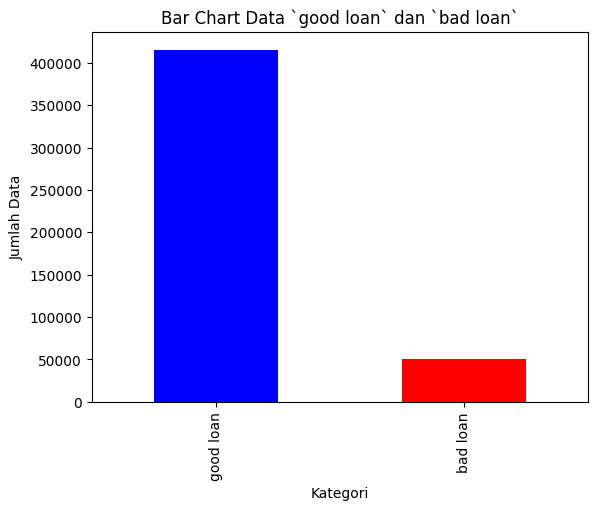

In [ ]:
labels = clean_dataset['loan_label'].value_counts()

labels.plot(kind='bar', color=['blue', 'red'])

plt.title('Bar Chart Data `good loan` dan `bad loan`')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.show()

Dari grafik diatas, dataset yang kita miliki tidak seimbang sehingga saat sebuah data baru dengan kategori `bad loan` dimasukkan, bisa saja data tersebut diprediksi sebagai `good loan` oleh algoritma Machine Learning. Sehingga dataset tersebut harus kita lakukan oversampling pada data `bad loan` atau undersampling pada data `good loan`.

Agar tidak terjadi data leakage saat oversampling atau undersampling, kita split dulu dataset kita menjadi data latih dan data uji. Kita gunakan persentase pemisahan data latih dan data uji yang umum digunakan yaitu 80% data latih dan 20% data uji.

In [ ]:
# Pisahkan fitur dengan label pada dataset
X = clean_dataset.drop('loan_label', axis=1)
y = clean_dataset['loan_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Pada proyek ini, kita akan melakukan dua skenario klasifikasi. Skenario pertama melakukan klasifikasi dengan data latih yang telah dilakukan oversampling. Skenario kedua melakukan klasifikasi dengan data latih yang telah dilakukan undersampling. Karena dataset yang digunakan merupakan imbalance dataset, maka metode Machine Learning yang digunakan adalah Ensemble Machine Learning. Model Machine Learning yang digunakan antara lain Random Forest, AdaBoost, dan Gradient Boosting.

In [ ]:
X_train.shape

(373028, 99)

In [ ]:
y_train.value_counts()

good loan    332250
bad loan      40778
Name: loan_label, dtype: int64

**Skenario 1: Oversampling Data**

In [ ]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)

In [ ]:
X_train_oversampled.shape

(664500, 99)

In [ ]:
y_train_oversampled.value_counts()

good loan    332250
bad loan     332250
Name: loan_label, dtype: int64

In [ ]:
# Inisialisasi model
rf_model_1 = RandomForestClassifier()
adaboost_model_1 = AdaBoostClassifier()
gradientboost_model_1 = GradientBoostingClassifier()

# Pelatihan model
rf_model_1.fit(X_train_oversampled, y_train_oversampled)
adaboost_model_1.fit(X_train_oversampled, y_train_oversampled)
gradientboost_model_1.fit(X_train_oversampled, y_train_oversampled)

# Pengujian model
rf_test_1 = rf_model_1.predict(X_test)
adaboost_test_1 = adaboost_model_1.predict(X_test)
gradientboost_test_1 = gradientboost_model_1.predict(X_test)

In [ ]:
# Classification report untuk Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_test_1))

# Classification report untuk AdaBoost
print("\nAdaBoost Classification Report:")
print(classification_report(y_test, adaboost_test_1))

# Classification report untuk Gradient Boosting
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, gradientboost_test_1))

Random Forest Classification Report:
              precision    recall  f1-score   support

    bad loan       0.97      0.50      0.66     10190
   good loan       0.94      1.00      0.97     83067

    accuracy                           0.94     93257
   macro avg       0.95      0.75      0.81     93257
weighted avg       0.94      0.94      0.94     93257


AdaBoost Classification Report:
              precision    recall  f1-score   support

    bad loan       0.42      0.72      0.53     10190
   good loan       0.96      0.88      0.92     83067

    accuracy                           0.86     93257
   macro avg       0.69      0.80      0.72     93257
weighted avg       0.90      0.86      0.88     93257


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

    bad loan       0.42      0.73      0.53     10190
   good loan       0.96      0.88      0.92     83067

    accuracy                           0.86     93257
   macro avg    

Pada skenario 1, model Random Forest unggul dari nilai akurasi, precision, recall dan f1-score.

**Skenario 2: Undersampling Data**

In [ ]:
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

In [ ]:
X_train_undersampled.shape

(81556, 99)

In [ ]:
y_train_undersampled.value_counts()

bad loan     40778
good loan    40778
Name: loan_label, dtype: int64

In [ ]:
# Inisialisasi model
rf_model_2 = RandomForestClassifier()
adaboost_model_2 = AdaBoostClassifier()
gradientboost_model_2 = GradientBoostingClassifier()

# Pelatihan model
rf_model_2.fit(X_train_undersampled, y_train_undersampled)
adaboost_model_2.fit(X_train_undersampled, y_train_undersampled)
gradientboost_model_2.fit(X_train_undersampled, y_train_undersampled)

# Pengujian model
rf_test_2 = rf_model_2.predict(X_test)
adaboost_test_2 = adaboost_model_2.predict(X_test)
gradientboost_test_2 = gradientboost_model_2.predict(X_test)

In [ ]:
# Classification report untuk Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_test_2))

# Classification report untuk AdaBoost
print("\nAdaBoost Classification Report:")
print(classification_report(y_test, adaboost_test_2))

# Classification report untuk Gradient Boosting
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, gradientboost_test_2))

Random Forest Classification Report:
              precision    recall  f1-score   support

    bad loan       0.41      0.73      0.52     10190
   good loan       0.96      0.87      0.91     83067

    accuracy                           0.85     93257
   macro avg       0.69      0.80      0.72     93257
weighted avg       0.90      0.85      0.87     93257


AdaBoost Classification Report:
              precision    recall  f1-score   support

    bad loan       0.42      0.72      0.53     10190
   good loan       0.96      0.88      0.92     83067

    accuracy                           0.86     93257
   macro avg       0.69      0.80      0.73     93257
weighted avg       0.90      0.86      0.88     93257


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

    bad loan       0.43      0.73      0.54     10190
   good loan       0.96      0.88      0.92     83067

    accuracy                           0.86     93257
   macro avg    

Pada skenario kedua, nilai akurasi tertinggi didapat dari model AdaBoost dan Gradient Boosting. Namun nilai precision, recall dan f1-score yang didapat dari model Gradient Boosting pada data kategori `bad loan` lebih bagus daripada model AdaBoost. Sehingga hasil terbaik pada skenario kedua didapatkan dari model Gradient Boosting.

Kita bandingkan hasil terbaik klasifikasi pada skenario 1 dan 2

In [ ]:
# Classification report untuk Random Forest
print("Random Forest Skenario 1 Classification Report:")
print(classification_report(y_test, rf_test_1))

# Classification report untuk Gradient Boosting
print("\nGradient Boosting Skenario 2 Classification Report:")
print(classification_report(y_test, gradientboost_test_2))

Random Forest Skenario 1 Classification Report:
              precision    recall  f1-score   support

    bad loan       0.97      0.50      0.66     10190
   good loan       0.94      1.00      0.97     83067

    accuracy                           0.94     93257
   macro avg       0.95      0.75      0.81     93257
weighted avg       0.94      0.94      0.94     93257


Gradient Boosting Skenario 2 Classification Report:
              precision    recall  f1-score   support

    bad loan       0.43      0.73      0.54     10190
   good loan       0.96      0.88      0.92     83067

    accuracy                           0.86     93257
   macro avg       0.69      0.80      0.73     93257
weighted avg       0.90      0.86      0.88     93257



Dari perbandingan hasil klasifikasi skenario 1 dan 2, model Random Forest dengan data yang telah di oversampling jauh lebih unggul dibandingkan dengan model Gradient Boosting dengan data yang di undersampling. Sehingga kita gunakan sebagai hasil akhir klasifikasi.